<h1><center>Over Sampling and its effects on Model Metrics</center></h1>

We will try and explore the impact of sampling on Accuracy, Precision and Recall. 

We will use 3 sampling techniques:
* Over Sampling 
* Under Sampling
* SMOTE(Synthetic Minority Over-sampling Technique)

We will see which one has the most impact on Metrics. We will also try and see when we need to use Sampling and if it really helps.

Here, we are taking a simple dataset with 2 independent columns, no outliers and no null values.

In [12]:
import pandas as pd
import numpy as np

In [13]:
data=pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Let's look at the importance of class imbalance

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

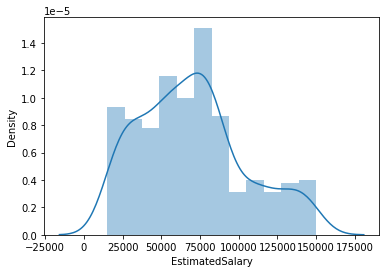

In [16]:
import seaborn as sns 
sns.distplot(data.EstimatedSalary)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

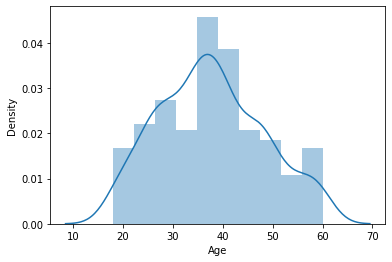

In [17]:
sns.distplot(data.Age)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='EstimatedSalary'>

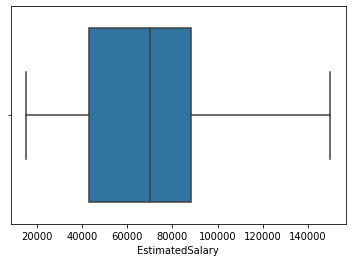

In [18]:
sns.boxplot(data.EstimatedSalary)

In [19]:
from sklearn.model_selection import train_test_split
X=data.drop("Purchased",axis=1)
y=data.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

In [20]:
samplingdf=pd.DataFrame(columns=["Model","Sampling","Accuracy","Recall","Precision"])

In [21]:
def Model_pipeline(X_train,X_test,y_train,y_test,sampling,samplingdf):    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trainstand=scaler.fit(X_train).transform(X_train)
    X_teststand=scaler.transform(X_test)
    #classification Metrics
    def metrics(clf,model,sampling,samplingdf):
        print("Model Type:",model,sampling)
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import precision_score
        y_pred_test = clf.predict(X_teststand)
        print("Accuracy for Test set:")
        print(accuracy_score(y_test,y_pred_test)) 
        print("\n")
        print("Recall for Test set:")
        print(recall_score(y_test,y_pred_test,pos_label=1))
        print("\n")
        print("Precision for Test set:")
        print(precision_score(y_test,y_pred_test,pos_label=1))
        print("\n")
        print("------------------------------------------------------------------------------")
        input1=pd.Series([model,sampling,accuracy_score(y_test,y_pred_test),
                recall_score(y_test,y_pred_test,pos_label=1),precision_score(y_test,y_pred_test,pos_label=1)], index = samplingdf. columns)
        samplingdf=samplingdf.append(input1,ignore_index=True)
        return samplingdf
    
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(random_state=0).fit(X_trainstand, y_train)
    samplingdf=metrics(clf,"Logistic Regression",sampling,samplingdf)
    
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0).fit(X_trainstand,y_train)
    samplingdf=metrics(clf,"Decision Tree",sampling,samplingdf)
    
    #GBM
    from sklearn.ensemble import GradientBoostingClassifier
    clf=GradientBoostingClassifier(random_state=0).fit(X_trainstand,y_train)
    samplingdf=metrics(clf,"Gradient Booster",sampling,samplingdf)
    
    #RandomForest
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_trainstand, y_train)
    samplingdf=metrics(clf,"Random Forest",sampling,samplingdf)
    
    #XGBoost
    from xgboost import XGBClassifier
    XGB_model = XGBClassifier(learning_rate=0.05)
    XGB_model.fit(X_trainstand, y_train)
    samplingdf=metrics(clf,"XGBoost",sampling,samplingdf)
    
    #SVM
    from sklearn.svm import SVC
    clf = SVC(random_state=0)
    clf.fit(X_trainstand, y_train)
    samplingdf=metrics(clf,"SVM normal",sampling,samplingdf)
    
    #kernal SVM
    from sklearn.svm import SVC
    clf = SVC(kernel="rbf")
    clf.fit(X_trainstand, y_train)
    samplingdf=metrics(clf,"SVM Kernal",sampling,samplingdf)
    
    return samplingdf

In [22]:
samplingdf=Model_pipeline(X_train,X_test,y_train,y_test,"No sampling",samplingdf)

Model Type: Logistic Regression No sampling
Accuracy for Test set:
0.8625


Recall for Test set:
0.6923076923076923


Precision for Test set:
0.8571428571428571


------------------------------------------------------------------------------
Model Type: Decision Tree No sampling
Accuracy for Test set:
0.9


Recall for Test set:
0.8846153846153846


Precision for Test set:
0.8214285714285714


------------------------------------------------------------------------------
Model Type: Gradient Booster No sampling
Accuracy for Test set:
0.925


Recall for Test set:
0.9230769230769231


Precision for Test set:
0.8571428571428571


------------------------------------------------------------------------------
Model Type: Random Forest No sampling
Accuracy for Test set:
0.9


Recall for Test set:
0.8846153846153846


Precision for Test set:
0.8214285714285714


------------------------------------------------------------------------------
[02:48:06] WARNING: ../src/learner.cc:1095: Starting i

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [23]:
samplingdf

,Model,Sampling,Accuracy,Recall,Precision
0,Logistic Regression,No sampling,0.8625,0.692308,0.857143
1,Decision Tree,No sampling,0.9000,0.884615,0.821429
2,Gradient Booster,No sampling,0.9250,0.923077,0.857143
3,Random Forest,No sampling,0.9000,0.884615,0.821429
4,XGBoost,No sampling,0.9000,0.884615,0.821429
5,SVM normal,No sampling,0.9625,1.000000,0.896552
6,SVM Kernal,No sampling,0.9625,1.000000,0.896552


# Over Sampling

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [25]:
samplingdf=Model_pipeline(X_train,X_test,y_train,y_test,"Over sampling",samplingdf)

Model Type: Logistic Regression Over sampling
Accuracy for Test set:
0.8875


Recall for Test set:
0.9230769230769231


Precision for Test set:
0.7741935483870968


------------------------------------------------------------------------------
Model Type: Decision Tree Over sampling
Accuracy for Test set:
0.875


Recall for Test set:
0.8461538461538461


Precision for Test set:
0.7857142857142857


------------------------------------------------------------------------------
Model Type: Gradient Booster Over sampling
Accuracy for Test set:
0.9375


Recall for Test set:
0.9615384615384616


Precision for Test set:
0.8620689655172413


------------------------------------------------------------------------------
Model Type: Random Forest Over sampling
Accuracy for Test set:
0.8875


Recall for Test set:
0.8846153846153846


Precision for Test set:
0.7931034482758621


------------------------------------------------------------------------------
[02:48:06] WARNING: ../src/learner.cc:10

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Under sampling

In [26]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)
X_train, y_train = cc.fit_resample(X_train, y_train)

In [27]:
samplingdf=Model_pipeline(X_train,X_test,y_train,y_test,"Under sampling",samplingdf)

Model Type: Logistic Regression Under sampling
Accuracy for Test set:
0.8875


Recall for Test set:
0.9230769230769231


Precision for Test set:
0.7741935483870968


------------------------------------------------------------------------------
Model Type: Decision Tree Under sampling
Accuracy for Test set:
0.8625


Recall for Test set:
0.8846153846153846


Precision for Test set:
0.7419354838709677


------------------------------------------------------------------------------
Model Type: Gradient Booster Under sampling
Accuracy for Test set:
0.9


Recall for Test set:
0.9230769230769231


Precision for Test set:
0.8


------------------------------------------------------------------------------
Model Type: Random Forest Under sampling
Accuracy for Test set:
0.875


Recall for Test set:
0.9230769230769231


Precision for Test set:
0.75


------------------------------------------------------------------------------
[02:48:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# SMOTE

In [28]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [29]:
samplingdf=Model_pipeline(X_train,X_test,y_train,y_test,"SMOTE",samplingdf)

Model Type: Logistic Regression SMOTE
Accuracy for Test set:
0.875


Recall for Test set:
0.8846153846153846


Precision for Test set:
0.7666666666666667


------------------------------------------------------------------------------
Model Type: Decision Tree SMOTE
Accuracy for Test set:
0.8875


Recall for Test set:
0.9615384615384616


Precision for Test set:
0.7575757575757576


------------------------------------------------------------------------------
Model Type: Gradient Booster SMOTE
Accuracy for Test set:
0.95


Recall for Test set:
0.9615384615384616


Precision for Test set:
0.8928571428571429


------------------------------------------------------------------------------
Model Type: Random Forest SMOTE
Accuracy for Test set:
0.9125


Recall for Test set:
0.9615384615384616


Precision for Test set:
0.8064516129032258


------------------------------------------------------------------------------
[02:48:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
samplingdf

,Model,Sampling,Accuracy,Recall,Precision
0,Logistic Regression,No sampling,0.8625,0.692308,0.857143
1,Decision Tree,No sampling,0.9000,0.884615,0.821429
2,Gradient Booster,No sampling,0.9250,0.923077,0.857143
3,Random Forest,No sampling,0.9000,0.884615,0.821429
4,XGBoost,No sampling,0.9000,0.884615,0.821429
5,SVM normal,No sampling,0.9625,1.000000,0.896552
6,SVM Kernal,No sampling,0.9625,1.000000,0.896552
7,Logistic Regression,Over sampling,0.8875,0.923077,0.774194
8,Decision Tree,Over sampling,0.8750,0.846154,0.785714
9,Gradient Booster,Over sampling,0.9375,0.961538,0.862069


In [31]:
samplingdf.sort_values(by=["Model","Sampling"])

,Model,Sampling,Accuracy,Recall,Precision
1,Decision Tree,No sampling,0.9000,0.884615,0.821429
8,Decision Tree,Over sampling,0.8750,0.846154,0.785714
22,Decision Tree,SMOTE,0.8875,0.961538,0.757576
15,Decision Tree,Under sampling,0.8625,0.884615,0.741935
2,Gradient Booster,No sampling,0.9250,0.923077,0.857143
9,Gradient Booster,Over sampling,0.9375,0.961538,0.862069
23,Gradient Booster,SMOTE,0.9500,0.961538,0.892857
16,Gradient Booster,Under sampling,0.9000,0.923077,0.800000
0,Logistic Regression,No sampling,0.8625,0.692308,0.857143
7,Logistic Regression,Over sampling,0.8875,0.923077,0.774194


# Analysing the Results

In [32]:
samplingdf.groupby("Sampling").mean()

,Accuracy,Recall,Precision
Sampling,,,
No sampling,0.916071,0.895604,0.853096
Over sampling,0.910714,0.928571,0.820217
SMOTE,0.919643,0.961538,0.823334
Under sampling,0.900000,0.939560,0.792780


AxesSubplot(0.125,0.125;0.775x0.755)


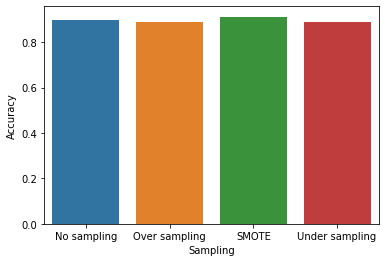

In [33]:
import seaborn as sns 

print(sns.barplot(data=samplingdf.groupby("Sampling").median().reset_index(),x="Sampling",y="Accuracy"))


AxesSubplot(0.125,0.125;0.775x0.755)


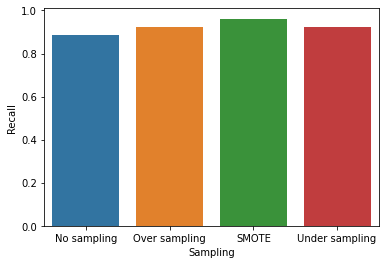

In [34]:
print(sns.barplot(data=samplingdf.groupby("Sampling").median().reset_index(),x="Sampling",y="Recall"))

AxesSubplot(0.125,0.125;0.775x0.755)


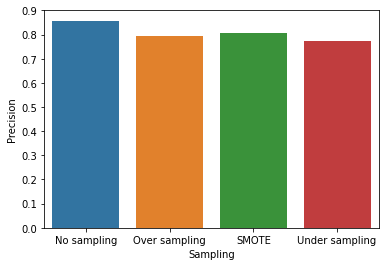

In [35]:
print(sns.barplot(data=samplingdf.groupby("Sampling").median().reset_index(),x="Sampling",y="Precision"))

Considering the aggregate of all models, we can see that sampling does not have much of an effect on accuracy,with a barely 1% difference.

However especially over sampling and SMOTE increase the recall considerably with over a 6% increase with SMOTE.

But we have to keep in mind that precision is effected significantly as we upscale with a reduction of more than 3-4%, this might not be important, for example a cancer prediction will depend on recall. however its important in applications such as youtube recommendations,etc. 

## Let's look at how it affects weak models

In [40]:
samplingdf[samplingdf.Model=="Logistic Regression"]

,Model,Sampling,Accuracy,Recall,Precision
0,Logistic Regression,No sampling,0.8625,0.692308,0.857143
7,Logistic Regression,Over sampling,0.8875,0.923077,0.774194
14,Logistic Regression,Under sampling,0.8875,0.923077,0.774194
21,Logistic Regression,SMOTE,0.8750,0.884615,0.766667


<AxesSubplot:xlabel='Sampling', ylabel='Accuracy'>

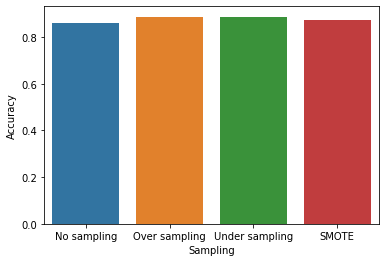

In [41]:
sns.barplot(data=samplingdf[samplingdf.Model=="Logistic Regression"],x="Sampling",y="Accuracy")

There doesn't seem to be much affect on accuracy with a 1%-2% increase due to oversampling, I would not consider this significant.

<AxesSubplot:xlabel='Sampling', ylabel='Recall'>

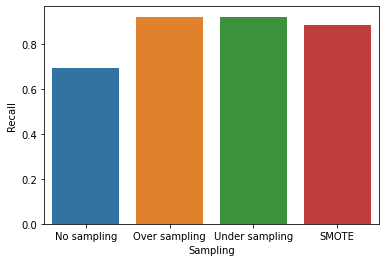

In [38]:
sns.barplot(data=samplingdf[samplingdf.Model=="Logistic Regression"],x="Sampling",y="Recall")

Recall has increased immensly due to sampling with fair 40-45% increase, any sampling definately increases Recall. Over sampling and Under sampling seem to be giving the same recall 

<AxesSubplot:xlabel='Sampling', ylabel='Precision'>

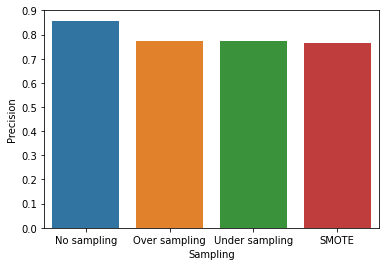

In [39]:
sns.barplot(data=samplingdf[samplingdf.Model=="Logistic Regression"],x="Sampling",y="Precision")

Precision has taken a hit with 10-12% decrease due to sampling.

## How about Strong Models?

In [46]:
samplingdf[samplingdf.Model=="XGBoost"]

,Model,Sampling,Accuracy,Recall,Precision
4,XGBoost,No sampling,0.9000,0.884615,0.821429
11,XGBoost,Over sampling,0.8875,0.884615,0.793103
18,XGBoost,Under sampling,0.8750,0.923077,0.750000
25,XGBoost,SMOTE,0.9125,0.961538,0.806452


<AxesSubplot:xlabel='Sampling', ylabel='Accuracy'>

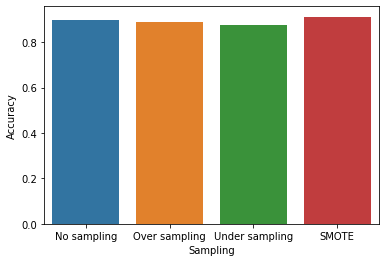

In [42]:
sns.barplot(data=samplingdf[samplingdf.Model=="XGBoost"],x="Sampling",y="Accuracy")

<AxesSubplot:xlabel='Sampling', ylabel='Recall'>

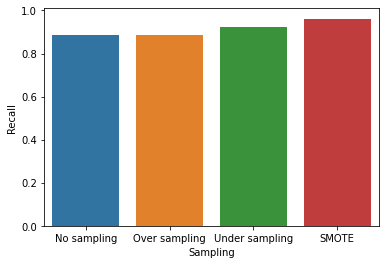

In [43]:
sns.barplot(data=samplingdf[samplingdf.Model=="XGBoost"],x="Sampling",y="Recall")

<AxesSubplot:xlabel='Sampling', ylabel='Precision'>

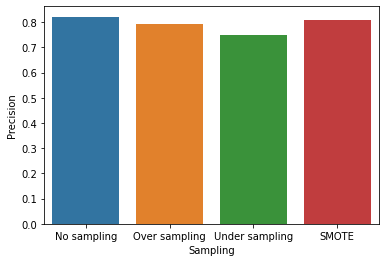

In [44]:
sns.barplot(data=samplingdf[samplingdf.Model=="XGBoost"],x="Sampling",y="Precision")

From the above charts we see that for strong models:
* Accuracy increases but barely and only when using SMOTE
* Recall increases significantly,especially when using SMOTE
* Precision decreases especially when under sampling, but the decrease is insignificant when using SMOTE

# Conclusion

### From all the above I have come to a conclusion that sampling is extremely effective in increasing Recall, which is the popular metric among others. However, when precision is involved, the safest bet is not indulge in any Sampling. 

### I believe that the best sampling to use in any circumstance is SMOTE since its has the highest increase in recall in most cases and lowest decrease in precision.